<a href="https://colab.research.google.com/github/zainabhana15/Machine-learning-fundamentals/blob/main/module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING AND CLEANING DATASET


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()

# Convert to a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable (species)
df['species'] = data.target

# Preview the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


DATA TRANSFORMATIONS

In [ ]:
# Features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


IMPLEMENT A CLASSIFICATION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

MODEL EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(1.0,
 array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n')

VISUALISE THE RESULT

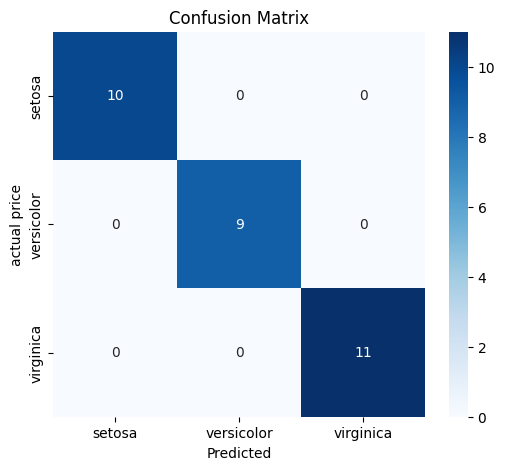

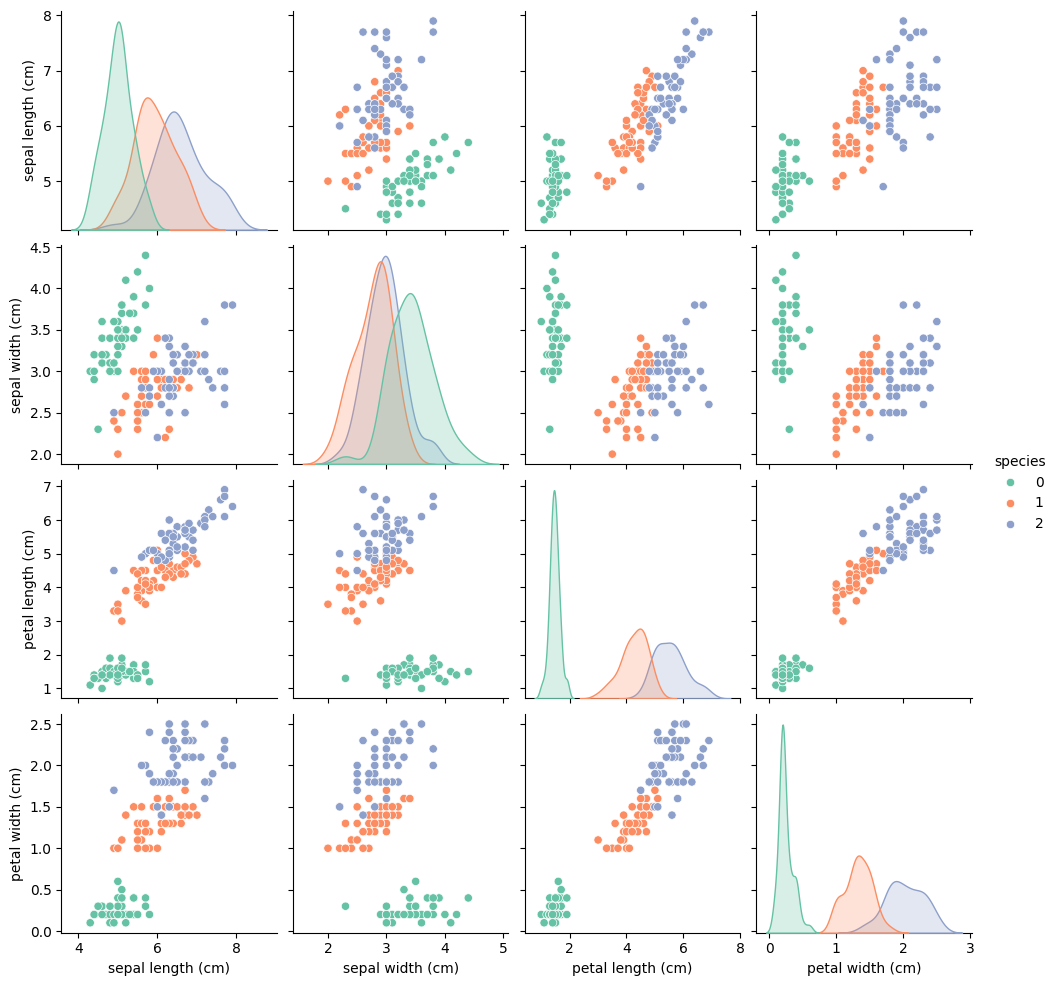

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('actual price')
plt.show()

# Pairplot to visualize feature distributions
sns.pairplot(df, hue='species', palette='Set2')
plt.show()
